<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finding-best-model-with-Gaussian-Process-Regression-(GPR)" data-toc-modified-id="Finding-best-model-with-Gaussian-Process-Regression-(GPR)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finding best model with Gaussian Process Regression (GPR)</a></span><ul class="toc-item"><li><span><a href="#Find-best-model" data-toc-modified-id="Find-best-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Find best model</a></span></li></ul></li></ul></div>

# Finding best model with Gaussian Process Regression (GPR)

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
%matplotlib notebook

In [55]:
# import own modules
import run_gpr
from gpr_alg import plot_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp
import pickle

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [56]:
# Load statistics from model fitting with different kernels
#store = pd.HDFStore('grid_search_stats_2D_100_iterations_with_noise.h5')
#model_stats = store['df']
model_stats = pd.read_pickle('grid_search_stats_2D_100_iterations_with_noise.pkl')
model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.387918,"[-0.35742772880487184, 0.4483481734478236, 1.2...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."
6,RationalQuadratic: {'length_scale': 1.00010900...,0.387918,"[-0.3574277288048536, 0.448348173447892, 1.232...","[[1.4999997755005268e-07, 3.2954875604112623e-..."
7,RationalQuadratic: {'length_scale': 0.04201829...,0.333796,"[-0.3574275252573118, 0.4483484150290584, 1.23...","[[1.499999292553511e-07, 5.706546346573305e-14..."
8,RationalQuadratic: {'length_scale': 0.04201829...,0.333796,"[-0.357427525256953, 0.44834841502918454, 1.23...","[[1.499999294773957e-07, 5.773159728050814e-14..."
9,RationalQuadratic: {'length_scale': 0.04201828...,0.333796,"[-0.35742752525739085, 0.4483484150290078, 1.2...","[[1.4999992992148492e-07, 5.850875339774575e-1..."
10,RationalQuadratic: {'length_scale': 0.04201828...,0.333796,"[-0.3574275252573935, 0.4483484150290158, 1.23...","[[1.4999993003250722e-07, 5.717648576819556e-1..."
11,RationalQuadratic: {'length_scale': 0.04201830...,0.333796,"[-0.357427525257628, 0.44834841502898737, 1.23...","[[1.4999992969944032e-07, 5.795364188543317e-1..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.164253,"[-0.03129365864689726, 0.43169211064828383, 0....","[[0.26094751791659165, 0.03158270070004643, 0...."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.333786,"[-0.3574189530606109, 0.4483519841537529, 1.23...","[[1.5149917185541817e-05, 6.772171712299269e-1..."


In [57]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.164253,"[-0.03129365864689726, 0.43169211064828383, 0....","[[0.26094751791659165, 0.03158270070004643, 0...."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.333786,"[-0.3574189530606109, 0.4483519841537529, 1.23...","[[1.5149917185541817e-05, 6.772171712299269e-1..."
8,RationalQuadratic: {'length_scale': 0.04201829...,0.333796,"[-0.357427525256953, 0.44834841502918454, 1.23...","[[1.499999294773957e-07, 5.773159728050814e-14..."
9,RationalQuadratic: {'length_scale': 0.04201828...,0.333796,"[-0.35742752525739085, 0.4483484150290078, 1.2...","[[1.4999992992148492e-07, 5.850875339774575e-1..."
10,RationalQuadratic: {'length_scale': 0.04201828...,0.333796,"[-0.3574275252573935, 0.4483484150290158, 1.23...","[[1.4999993003250722e-07, 5.717648576819556e-1..."
7,RationalQuadratic: {'length_scale': 0.04201829...,0.333796,"[-0.3574275252573118, 0.4483484150290584, 1.23...","[[1.499999292553511e-07, 5.706546346573305e-14..."
11,RationalQuadratic: {'length_scale': 0.04201830...,0.333796,"[-0.357427525257628, 0.44834841502898737, 1.23...","[[1.4999992969944032e-07, 5.795364188543317e-1..."
6,RationalQuadratic: {'length_scale': 1.00010900...,0.387918,"[-0.3574277288048536, 0.448348173447892, 1.232...","[[1.4999997755005268e-07, 3.2954875604112623e-..."
0,RBF: {'length_scale': 9.999999999999997e-06},0.387918,"[-0.35742772880487184, 0.4483481734478236, 1.2...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."


In [58]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RBF + WhiteKernel: {'k1': RBF(length_scale=0.23), 'k2': WhiteKernel(noise_level=0.216), 'k1__length_scale': 0.23041651711416827, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.2162502326524062, 'k2__noise_level_bounds': (1e-05, 100000.0)}
RationalQuadratic + WhiteKernel: {'k1': RationalQuadratic(alpha=0.158, length_scale=0.042), 'k2': WhiteKernel(noise_level=1e-05), 'k1__length_scale': 0.042020427973070484, 'k1__alpha': 0.15828864813848656, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k1__alpha_bounds': (1e-05, 100000.0), 'k2__noise_level': 9.999999999999997e-06, 'k2__noise_level_bounds': (1e-05, 100000.0)}
RationalQuadratic: {'length_scale': 0.04201829471773215, 'alpha': 0.15828839114067048}
RationalQuadratic: {'length_scale': 0.042018283478266825, 'alpha': 0.1582888029096882}
RationalQuadratic: {'length_scale': 0.04201828363238303, 'alpha': 0.1582888038836807}
RationalQuadratic: {'length_scale': 0.042018290967290976, 'alpha': 0.15828873827727524}
RationalQuadrat

We compare the analyse the fit with the mean absolut error and a model where the kernel includes a white noise kernel.

In [59]:
# Get model with smallest mean absolut error
mean_prediction_best =  model_stats['pred_mean'].iloc[0]
cov_prediction_best = model_stats['pred_cov'].iloc[0]

print('Kernel: ' + str(model_stats['kernel'].iloc[0]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[0]))

Kernel: RBF + WhiteKernel: {'k1': RBF(length_scale=0.23), 'k2': WhiteKernel(noise_level=0.216), 'k1__length_scale': 0.23041651711416827, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.2162502326524062, 'k2__noise_level_bounds': (1e-05, 100000.0)}
Mean absolut error: 0.16425335693607032


In [60]:
# Get model with white noise kernel
mean_prediction_wk =  model_stats['pred_mean'].iloc[8]
cov_prediction_wk = model_stats['pred_cov'].iloc[8]

print('Kernel: ' + str(model_stats['kernel'].iloc[8]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[8]))

Kernel: RBF: {'length_scale': 9.999999999999997e-06}
Mean absolut error: 0.3879176725787938


In [61]:
# Load grid and data
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=True)

applying conditions
train set size: 0.79


<IPython.core.display.Javascript object>


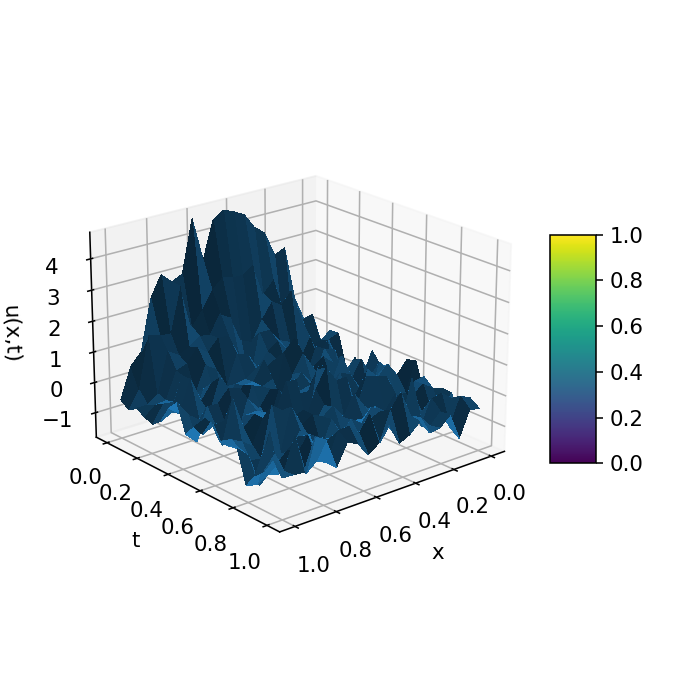

In [62]:
# Plot original data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='original_data_noise.png')

<IPython.core.display.Javascript object>


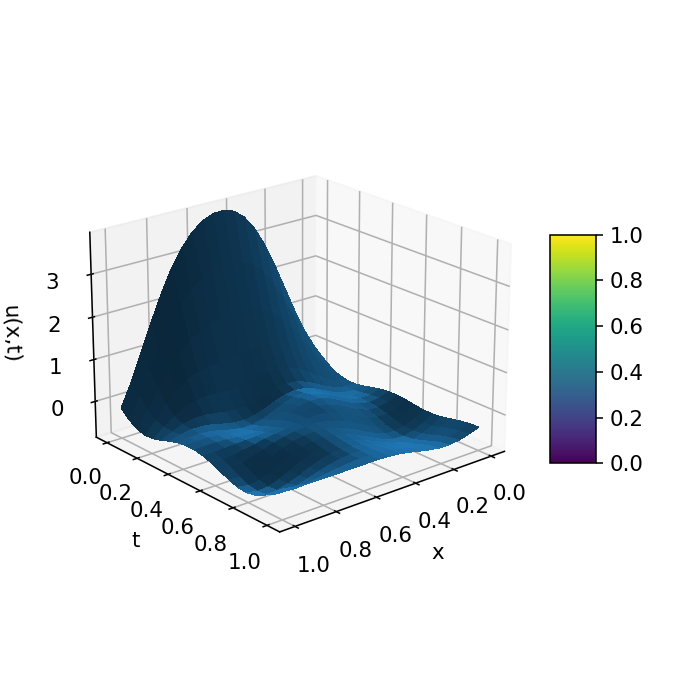

<IPython.core.display.Javascript object>


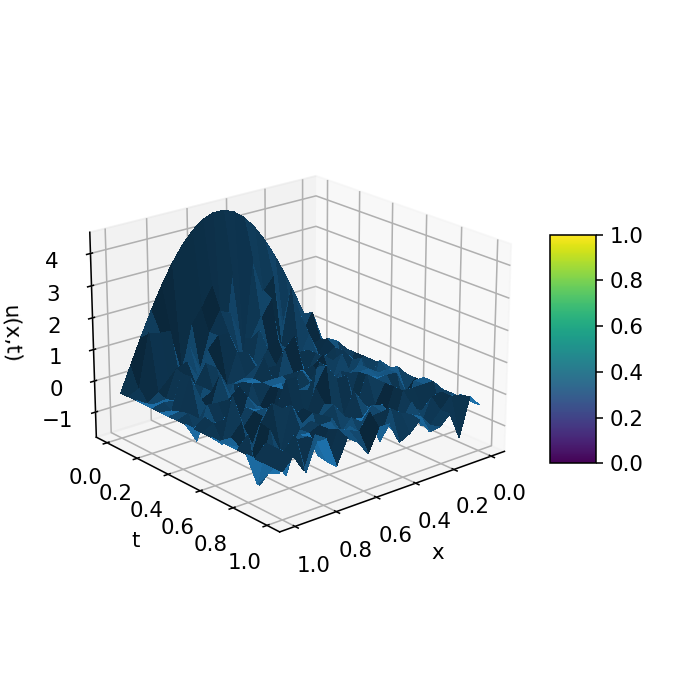

In [63]:
# Plot fitted data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise.png')

plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise_wk.png')

<IPython.core.display.Javascript object>


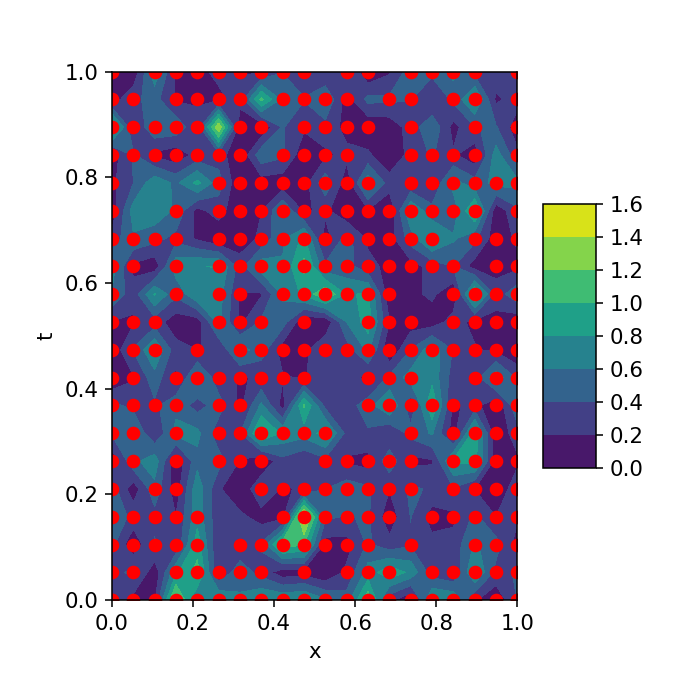

<IPython.core.display.Javascript object>


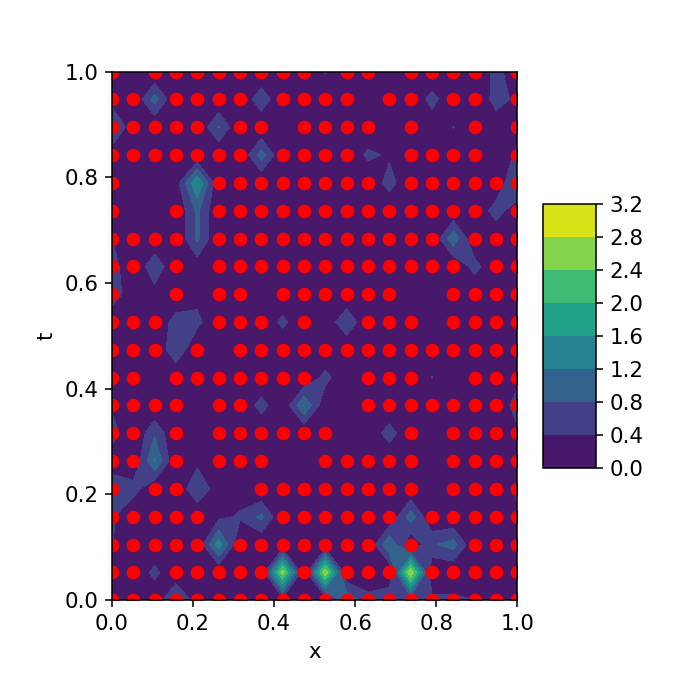

In [64]:
error_best = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
error_wk = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise.png')

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise_wk.png')

applying conditions
train set size: 0.79
0.16425335693607032
0.3879176725787938


<IPython.core.display.Javascript object>


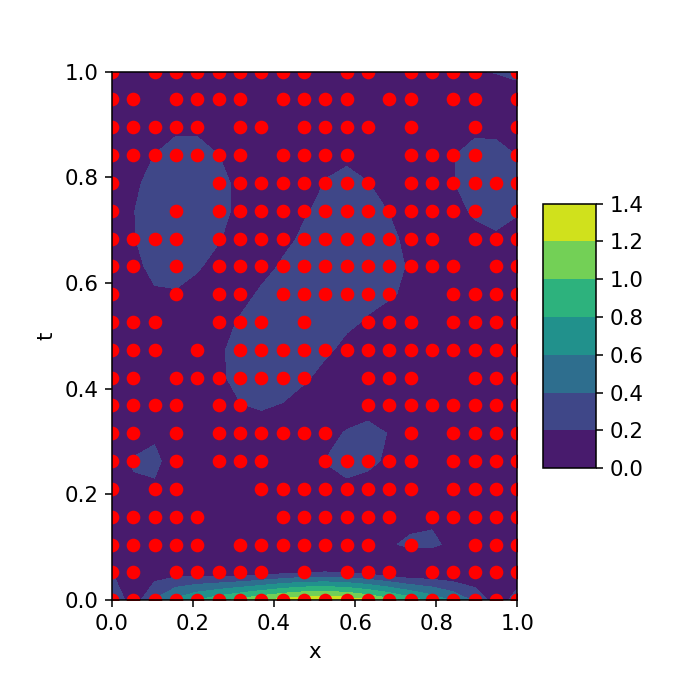

<IPython.core.display.Javascript object>


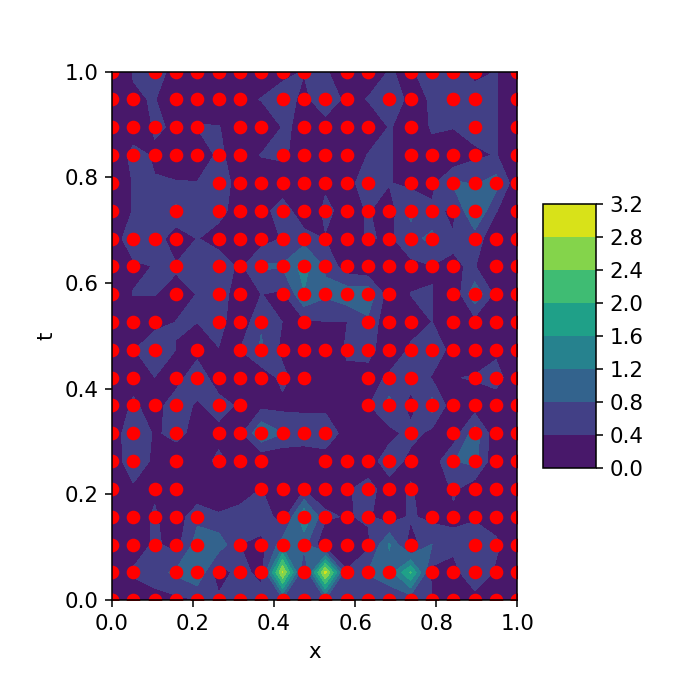

In [65]:
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=False)
error_best = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
error_wk = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
print(np.mean(error_best))
print(np.mean(error_wk))
# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise2.png')

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise_wk2.png')